In [1]:
import pyspark
from pyspark.sql import SQLContext,SparkSession
from pyspark import SparkContext,SparkConf
import numpy as np
import pandas as pd

In [2]:
sc = SparkContext()
spark = SparkSession(sc)

# Data Fetching

In [3]:
job_locate = pd.read_csv("jobcount_by_location.csv")

In [4]:
job_locate

,Unnamed: 0,Location,Count of Jobs at that location
0,0,"California, US",418955
1,1,"Texas, US",303688
2,2,"Illinois, US",259936
3,3,"New York, US",252639
4,4,"Pennsylvania, US",236316
5,5,"Florida, US",232094
6,6,"Ohio, US",212025
7,7,"Washington, US",197480
8,8,"Georgia, US",196842
9,9,"Massachusetts, US",187468


In [5]:
job_loc = []
#tuple_list = []
for i in range(len(job_locate)):
    job_loc.append((i,job_locate['Location'][i]))
    
job_loc = tuple(job_loc)
job_loc

((0, 'California, US'),
 (1, 'Texas, US'),
 (2, 'Illinois, US'),
 (3, 'New York, US'),
 (4, 'Pennsylvania, US'),
 (5, 'Florida, US'),
 (6, 'Ohio, US'),
 (7, 'Washington, US'),
 (8, 'Georgia, US'),
 (9, 'Massachusetts, US'),
 (10, 'New Jersey, US'),
 (11, 'North Carolina, US'),
 (12, 'Virginia, US'),
 (13, 'Michigan, US'),
 (14, 'Maryland, US'),
 (15, 'Indiana, US'),
 (16, 'Tennessee, US'),
 (17, 'Arizona, US'),
 (18, 'Missouri, US'),
 (19, 'Wisconsin, US'),
 (20, 'Minnesota, US'),
 (21, 'Colorado, US'),
 (22, 'Kentucky, US'),
 (23, 'Connecticut, US'),
 (24, 'South Carolina, US'),
 (25, 'Alabama, US'),
 (26, 'Oregon, US'),
 (27, 'Iowa, US'),
 (28, 'Mississippi, US'),
 (29, 'Utah, US'),
 (30, 'Louisiana, US'),
 (31, 'Oklahoma, US'),
 (32, 'Arkansas, US'),
 (33, 'Kansas, US'),
 (34, 'Nebraska, US'),
 (35, 'New Hampshire, US'),
 (36, 'Nevada, US'),
 (37, 'New Mexico, US'),
 (38, 'Idaho, US'),
 (39, 'Rhode Island, US'),
 (40, 'West Virginia, US'),
 (41, 'Maine, US'),
 (42, 'Delaware, US'),


In [6]:
histogram = spark.read.csv("salary_histogram.csv",header = True).rdd
job_location = spark.read.csv("jobcount_by_location.csv",header = True).rdd
job_company = spark.read.csv("jobcount_by_company.csv",header = True).rdd

In [7]:
job_list = ['Academic librarian',
 'Accountant',
 'Accounting technician',
 'Actuary',
 'Adult nurse',
 'Advertising account executive',
 'Advertising account planner',
 'Advertising copywriter',
 'Advice worker',
 'Advocate (Scotland)',
 'Aeronautical engineer',
 'Agricultural consultant',
 'Agricultural manager',
 'Aid worker/humanitarian worker',
 'Air traffic controller',
 'Airline cabin crew',
 'Amenity horticulturist',
 'Analytical chemist',
 'Animal nutritionist',
 'Animator',
 'Archaeologist',
 'Architect',
 'Architectural technologist',
 'Archivist',
 'Armed forces officer',
 'Aromatherapist',
 'Art therapist',
 'Arts administrator',
 'Auditor',
 'Automotive engineer',
 'Barrister',
 'Barrister’s clerk',
 'Bid manager',
 'Bilingual secretary',
 'Biomedical engineer',
 'Biomedical scientist',
 'Biotechnologist',
 'Border force officer',
 'Brand manager',
 'Broadcasting presenter',
 'Building control officer/surveyor',
 'Building services engineer',
 'Building surveyor',
 'Business analyst',
 'Camera operator',
 'Careers adviser (higher education)',
 'Careers adviser',
 'Careers consultant',
 'Cartographer',
 'Catering manager',
 'Charities administrator',
 'Charities fundraiser',
 'Chemical (process) engineer',
 'Child psychotherapist',
 "Children's nurse",
 'Chiropractor',
 'Civil engineer',
 'Civil Service administrator',
 'Clinical biochemist',
 'Clinical cytogeneticist',
 'Clinical microbiologist',
 'Clinical molecular geneticist',
 'Clinical research associate',
 'Clinical scientist - tissue typing',
 'Clothing and textile technologist',
 'Colour technologist',
 'Commercial airline pilot',
 'Commercial horticulturist',
 'Commercial/residential/rural surveyor',
 'Commissioning editor',
 'Commissioning engineer',
 'Commodity broker',
 'Communications engineer',
 'Community arts worker',
 'Community education officer',
 'Community worker',
 'Company secretary',
 'Computer sales support',
 'Computer scientist',
 'Conference organiser',
 'Consultant',
 'Control and instrumentation engineer',
 'Corporate banker',
 'Corporate treasurer',
 'Counsellor',
 'Court reporter/verbatim reporter',
 'Credit analyst',
 'Crown Prosecution Service lawyer',
 'Crystallographer',
 'Curator',
 'Customs officer',
 'Cyber security specialist',
 'Dance movement psychotherapist',
 'Data analyst',
 'Data scientist',
 'Data visualisation analyst',
 'Database administrator',
 'Debt/finance adviser',
 'Dental hygienist',
 'Dentist',
 'Design engineer',
 'Design manager (construction)',
 'DevOps engineer',
 'Dietitian',
 'Diplomatic service',
 'Doctor (general practitioner, GP)',
 'Doctor (hospital)',
 'Dramatherapist',
 'Economist',
 'Editorial assistant',
 'Education administrator',
 'Electrical engineer',
 'Electronics engineer',
 'Energy conservation officer',
 'Energy consultant',
 'Engineering geologist',
 'Environmental education officer',
 'Environmental health officer',
 'Environmental manager',
 'Environmental scientist',
 'Equal opportunities officer',
 'Equality and diversity officer',
 'Ergonomist',
 'Estate agent',
 'Estimator',
 'Exhibition display designer',
 'Exhibition organiser',
 'Exploration geologist',
 'Facilities manager',
 'Field trials officer',
 'Financial manager',
 'Fire engineer',
 'Firefighter',
 'Fisheries enforcement officer',
 'Fitness centre manager',
 'Food scientist',
 'Food technologist',
 'Forensic scientist',
 'Freight forwarder',
 'Geneticist',
 'Geographical information systems manager',
 'Geomatics/land surveyor',
 'Government lawyer',
 'Government research officer',
 'Graphic designer',
 'Health and safety adviser',
 'Health and safety inspector',
 'Health promotion specialist',
 'Health service manager',
 'Health visitor',
 'Herbalist',
 'Heritage manager',
 'Higher education administrator',
 'Higher education advice worker',
 'Homeless support worker',
 'Horticultural consultant',
 'Hotel manager',
 'Housing adviser',
 'Human resources officer',
 'Hydrologist',
 'Illustrator',
 'Immigration officer',
 'Immunologist',
 'Industrial/product designer',
 'Information scientist',
 'Information systems manager',
 'Information technology/software trainers',
 'Insurance broker',
 'Insurance claims inspector',
 'Insurance risk surveyor',
 'Insurance underwriter',
 'Interpreter',
 'Investment analyst',
 'Investment banker - corporate finance',
 'Investment banker – operations',
 'Investment fund manager',
 'IT consultant',
 'IT support analyst',
 'Journalist',
 'Laboratory technician',
 'Land-based engineer',
 'Landscape architect',
 'Learning disability nurse',
 'Learning mentor',
 'Lecturer (adult education)',
 'Lecturer (further education)',
 'Lecturer (higher education)',
 'Legal executive',
 'Leisure centre manager',
 'Licensed conveyancer',
 'Local government administrator',
 'Local government lawyer',
 'Logistics/distribution manager',
 'Magazine features editor',
 'Magazine journalist',
 'Maintenance engineer',
 'Management accountant',
 'Manufacturing engineer',
 'Manufacturing machine operator',
 'Manufacturing toolmaker',
 'Marine scientist',
 'Market research analyst',
 'Market research executive',
 'Marketing assistant',
 'Marketing executive',
 'Marketing manager (direct)',
 'Marketing manager (social media)',
 'Materials engineer',
 'Materials specialist',
 'Mechanical engineer',
 'Media analyst',
 'Media buyer',
 'Media planner',
 'Medical physicist',
 'Medical representative',
 'Mental health nurse',
 'Metallurgist',
 'Meteorologist',
 'Microbiologist',
 'Midwife',
 'Mining engineer',
 'Mobile developer',
 'Multimedia programmer',
 'Multimedia specialists',
 'Museum education officer',
 'Museum/gallery exhibition officer',
 'Music therapist',
 'Nanoscientist',
 'Nature conservation officer',
 'Naval architect',
 'Network administrator',
 'Nurse',
 'Nutritional therapist',
 'Nutritionist',
 'Occupational therapist',
 'Oceanographer',
 'Office manager',
 'Operational researcher',
 'Orthoptist',
 'Outdoor pursuits manager',
 'Packaging technologist',
 'Paramedic',
 'Patent attorney',
 'Patent examiner',
 'Pension scheme manager',
 'Personal assistant',
 'Petroleum engineer',
 'Pharmacist',
 'Pharmacologist',
 'Pharmacovigilance officer',
 'Photographer',
 'Physiotherapist',
 'Picture researcher',
 'Planning and development surveyor',
 'Planning technician',
 'Plant breeder',
 'Police officer',
 'Political party agent',
 'Political researcher',
 'Practice nurse',
 'Press photographer',
 'Press sub-editor',
 'Prison officer',
 'Private music teacher',
 'Probation officer',
 'Product development scientist',
 'Production manager',
 'Programme researcher',
 'Project manager',
 'Psychologist (clinical): job descriptions Psychologist (educational)',
 'Psychotherapist',
 'Public affairs consultant (lobbyist)',
 'Public affairs consultant (research)',
 'Public house manager',
 'Public librarian',
 'Public relations (PR) officer',
 'QA analyst',
 'Quality assurance manager',
 'Quantity surveyor',
 'Records manager',
 'Recruitment consultant',
 'Recycling officer',
 'Regulatory affairs officer',
 'Research chemist',
 'Research scientist',
 'Restaurant manager',
 'Retail banker',
 'Retail buyer',
 'Retail manager',
 'Retail merchandiser',
 'Retail pharmacist',
 'Sales executive',
 'Scene of crime officer',
 'Secretary',
 'Seismic interpreter',
 'Site engineer',
 'Site manager',
 'Social researcher',
 'Social worker',
 'Software developer',
 'Software engineer',
 'Soil scientist',
 'Solicitor',
 'Speech and language therapist',
 'Sports coach',
 'Sports development officer',
 'Sports therapist',
 'Statistician',
 'Stockbroker',
 'Structural engineer',
 'Systems analyst',
 'Systems developer',
 'Tax inspector',
 'Teacher (nursery/early years)',
 'Teacher (primary)',
 'Teacher (secondary)',
 'Teacher (special educational needs)',
 'Teaching/classroom assistant',
 'Technical author',
 'Technical sales engineer',
 'TEFL/TESL teacher',
 'Television production assistant',
 'Test automation developer',
 'Tour guide',
 'Tour operator',
 'Tour/holiday representative',
 'Tourism officer',
 'Tourist information manager',
 'Town and country planner',
 'Toxicologist',
 'Trade union official',
 'Trade union research officer',
 'Trader',
 'Trading standards officer',
 'Training and development officer',
 'Translator',
 'Transportation planner',
 'Travel agent',
 'TV/film/theatre set designer',
 'UX designer',
 'Validation engineer',
 'Veterinary nurse',
 'Veterinary surgeon',
 'Video game designer',
 'Video game developer',
 'Volunteer work organiser: Job description Warehouse manager',
 'Waste management officer',
 'Water conservation officer',
 'Water engineer',
 'Web designer',
 'Web developer',
 'Welfare rights adviser',
 'Writer',
 'Youth worker']

In [8]:
tuple_list = []
for i in range(len(job_list)):
    tuple_list.append((i,job_list[i]))
    
tuple_list = tuple(tuple_list)
tuple_list

((0, 'Academic librarian'),
 (1, 'Accountant'),
 (2, 'Accounting technician'),
 (3, 'Actuary'),
 (4, 'Adult nurse'),
 (5, 'Advertising account executive'),
 (6, 'Advertising account planner'),
 (7, 'Advertising copywriter'),
 (8, 'Advice worker'),
 (9, 'Advocate (Scotland)'),
 (10, 'Aeronautical engineer'),
 (11, 'Agricultural consultant'),
 (12, 'Agricultural manager'),
 (13, 'Aid worker/humanitarian worker'),
 (14, 'Air traffic controller'),
 (15, 'Airline cabin crew'),
 (16, 'Amenity horticulturist'),
 (17, 'Analytical chemist'),
 (18, 'Animal nutritionist'),
 (19, 'Animator'),
 (20, 'Archaeologist'),
 (21, 'Architect'),
 (22, 'Architectural technologist'),
 (23, 'Archivist'),
 (24, 'Armed forces officer'),
 (25, 'Aromatherapist'),
 (26, 'Art therapist'),
 (27, 'Arts administrator'),
 (28, 'Auditor'),
 (29, 'Automotive engineer'),
 (30, 'Barrister'),
 (31, 'Barrister’s clerk'),
 (32, 'Bid manager'),
 (33, 'Bilingual secretary'),
 (34, 'Biomedical engineer'),
 (35, 'Biomedical scient

# Parallel Processing

In [25]:
def get_job_by_category_company(keyword):
    search_list = []
    for i in job_list:
        if keyword.title() in i.title():
            search_list.append(i)
    #print(search_list)
    total = 0
    count_dict = {}
    for i in search_list:
        result = job_company.filter(lambda r: r['Category'] == i ).map(lambda r: r['Count of Jobs in that company'])
        result_list = np.int64(result.collect())
        count = 0
        for c in result_list:
            count = count + c
        count_dict[i]= count
        total = total + count
    return total , count_dict

In [26]:
def get_job_by_category_location(location):
    total = 0
    count_dict = {}
    result = job_location.filter(lambda r: r['Location'] == location ).map(lambda r: r['Count of Jobs at that location'])
    job_total=np.int64(result.collect())
    return job_total[0]

In [27]:
total_com, count_dict_com = get_job_by_category_company('Data')
print (total_com, count_dict_com)

37795 {'Data analyst': 1358, 'Data scientist': 32605, 'Data visualisation analyst': 18, 'Database administrator': 3814}


In [28]:
job_total = get_job_by_category_location('California, US')

In [29]:
job_total

418955

# Exploratory Data Analysis

In [30]:
def salary_histogram(keyword):
    search_list = []
    for i in job_list:
        if keyword.title() in i.title():
            search_list.append(i)
    #print(search_list)
    total = 0
    hist_dict = {}
    approx_salary ={}
    for i in search_list:
        result = histogram.filter(lambda r: r['Category'] == i ).map(lambda r: (r['Count of Jobs in that salary range'], r["Approximate Salary"]))
        result_list = result.collect()
        hist_dict[i] = np.int64(result_list)
    return hist_dict

In [62]:
hist = salary_histogram('Police officer')

In [68]:
hist['Police officer']

array([[     7,  60000],
       [    18,  40000],
       [     0,  80000],
       [     0, 120000],
       [    23,  20000],
       [     0, 140000],
       [     0, 100000]])

In [64]:
# Plotting the Data distribution based on the labels
labels = []
jobs = []
for j in hist:
    for i in range(len(hist[j])):
        labels.append(hist[j][i][1])
        jobs.append(hist[j][i][0])


In [65]:
labels

[60000, 40000, 80000, 120000, 20000, 140000, 100000]

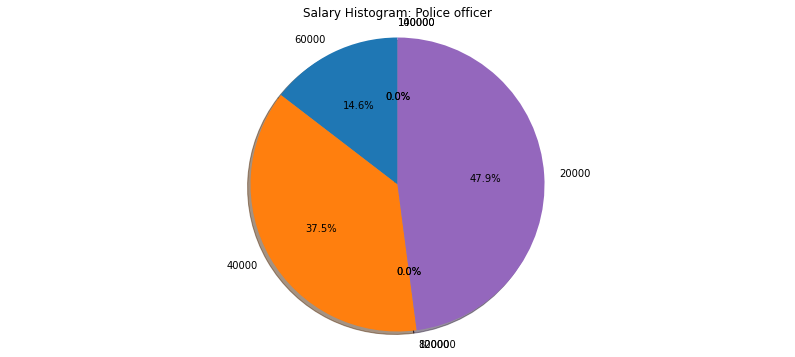

In [67]:
from matplotlib import pyplot as plt
# Creating plot
fig = plt.figure(figsize=(14, 6))

plt.pie(jobs, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal') 
plt.title("Salary Histogram: Police officer")
plt.show()